In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# Step 1: Data Ingestion
data_path = "/content/usecase_4_.xlsx"
data = pd.read_excel(data_path)

# Display basic information about the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()

Dataset Head:
    NCT Number                                        Study Title  \
0  NCT00900809  QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...   
1  NCT01113515  Clinical Investigation of GalnobaxÂ® for the T...   
2  NCT01288573  A Combined Study in Pediatric Cancer Patients ...   
3  NCT01336660  A Trial of Equine F (ab')2 Antivenom for Treat...   
4  NCT01376167  Ph 2B/3 Tafenoquine (TFQ) Study in Prevention ...   

                                      Study URL Study Status  \
0  https://clinicaltrials.gov/study/NCT00900809    COMPLETED   
1  https://clinicaltrials.gov/study/NCT01113515    COMPLETED   
2  https://clinicaltrials.gov/study/NCT01288573    COMPLETED   
3  https://clinicaltrials.gov/study/NCT01336660    COMPLETED   
4  https://clinicaltrials.gov/study/NCT01376167    COMPLETED   

                                       Brief Summary Study Results  \
0  NK cells from patients with malignant diseases...            NO   
1  The purpose of this study is to determine s

In [2]:
# Handling missing values
data = data.dropna(subset=['Secondary Outcome Measures', 'Other Outcome Measures', 'Collaborators'])
data = data.fillna({'Study Recruitment Rate': data['Study Recruitment Rate'].median()})

# Splitting features and target
target_column = "Study Recruitment Rate"
X = data.drop(columns=[target_column])
y = data[target_column]

# Categorical and numerical features
categorical_features = ['Study Status', 'Conditions', 'Interventions', 'Sponsor', 'Funder Type', 'Study Type', 'Phases']
numerical_features = ['Enrollment']

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [3]:
# Step 3: Model Development
# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Step 4: Model Training and Evaluation
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

# Display results
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

Model Evaluation Results:

Linear Regression:
RMSE: 16228.9855
MAE: 1582.2624
R2: -16026.1072

Random Forest:
RMSE: 127.5201
MAE: 20.6786
R2: 0.0105


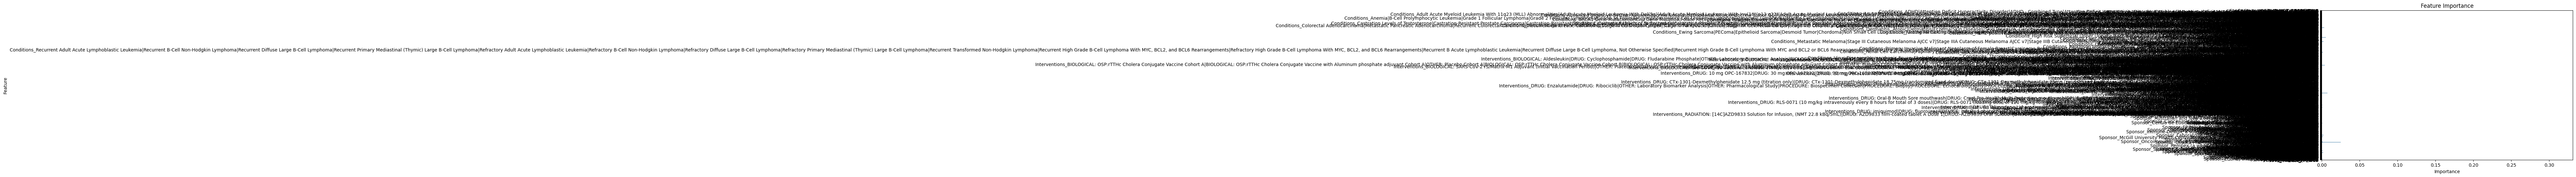

In [6]:
# Step 5: Feature Importance (Random Forest Example)
if "Random Forest" in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
    pipeline.fit(X_train, y_train)
    rf_model = pipeline.named_steps['model']
    feature_importances = rf_model.feature_importances_
    feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

    # Visualizing feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_names)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

In [7]:
# Step 6: Save Model (Deployment Preparation)
import joblib
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
final_pipeline.fit(X_train, y_train)
joblib.dump(final_pipeline, "clinical_trial_rr_model.pkl")

print("Model saved as clinical_trial_rr_model.pkl")

Model saved as clinical_trial_rr_model.pkl
